In [1]:
from db.helpers import new_sales_collection
from db.queries import new_sales_refenrece_ids_with_sales_count
from db.helpers import gm_sales_collection
import pandas as pd
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import random

/home/rageq8/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [221]:
def prophet_forecast_model(df: pd.DataFrame,key):
    tmp = df[[key, "Sales_Period"]].copy()
    tmp = tmp.set_index("Sales_Period")
    tmp = tmp.reset_index()[["Sales_Period", key]].rename(
        columns={"Sales_Period": "ds", key: "y"}
    )
    model = Prophet(
        yearly_seasonality=False,
        seasonality_mode = 'multiplicative',
        # changepoint_prior_scale=30,
        # seasonality_prior_scale=30,
        )
    return model.fit(tmp)


def get_prediction(model: Prophet, number_of_months):
    future_dates = model.make_future_dataframe(periods=number_of_months, freq="MS")
    predictions = model.predict(future_dates)
    return predictions

def find_seg(data:list[dict]):
    start_date = data[0]['Sales_Period']
    end_date = data[-1]['Sales_Period']
    for i in data:
        monthly_sales = i['Monthly_Sales']
        if type(monthly_sales) == int or type(monthly_sales) == float:
            start_date = i['Sales_Period']
            break
    for i in reversed(data):
        monthly_sales = i['Monthly_Sales']
        if type(monthly_sales) == int or type(monthly_sales) == float:
            end_date = i['Sales_Period']
            break
    result = [record for record in data  if start_date>= record['Sales_Period'] >= end_date] 
    for i in result:
        print(i['Monthly_Sales'])
    return result 

{'_id': 'Foodservice 2526', 'fieldN': 31}
47900.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
16224.0
None
None
None
None
None
None
None
None
22232.0
24270.0
24990.0
None
None
None
None
None
None
None
29178.0
31622.0
33240.0
29056.000000000004
28164.0
27842.0
21375.0
27066.0
None
28442.0
26148.0
None
27984.0


[{'_id': ObjectId('64de1fc166c496bec71a56ca'),
  'Primary_ID': 13701,
  'Primary_Sheet': 'Sales',
  'Primary_Full_ID': 'Sales 13701',
  'Reference_ID': 2526,
  'Reference_Sheet': 'Foodservice',
  'Reference_Full_ID': 'Foodservice 2526',
  'Company_Name': 'Volume International Restaurant Company',
  'Industry_Level_2': 'Coffeeshop',
  'Product_Focus': 'Coffee',
  'Brand': 'VOL.1\xa0',
  'Location_Name': 'Mariam Tower',
  'Location_Type': 'Business',
  'Location_Name_ID': 'Locations 806',
  'Level_1_Area': 'Kuwait',
  'Level_2_Area': 'Asimah',
  'Level_3_Area': 'Sharq',
  'Area_ID': 'Areas 2700',
  'Latitude': 29.374142,
  'Longitude': 47.979697,
  'Currency': 'KWD',
  'Weekday_Store_Sales': 1650.0,
  'Weekday_Delivery_Sales': 0.0,
  'Weekday_Total_Sales': 1650.0,
  'Weekend_Store_Sales': 1450.0,
  'Weekend_Delivery_Sales': 0.0,
  'Weekend_Total_Sales': 1450.0,
  'Monthly_Store_Sales': 47900.0,
  'Monthly_Delivery_Sales': 0.0,
  'Monthly_Sales': 47900.0,
  'Delivery_%': 0.0,
  'Drive_Thr

<Axes: xlabel='Sales_Period'>

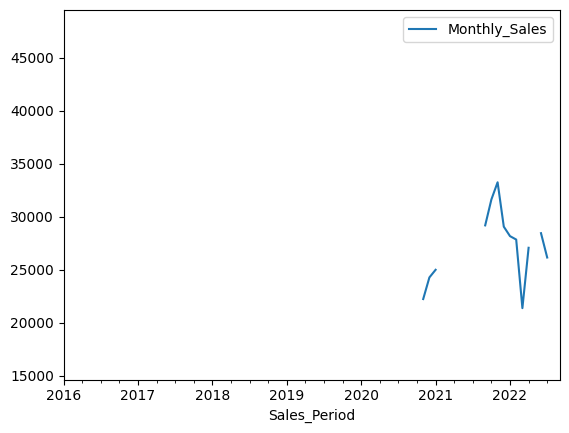

In [222]:
import numpy as np
reference_ids = list(new_sales_refenrece_ids_with_sales_count()) 
# id = random.choice(reference_ids) 
id = {'_id': 'Foodservice 2526', 'fieldN': 31}

 
print(id)
sales = list(
    new_sales_collection.find(
        {
            "Reference_Full_ID": id['_id'],
            # "Reference_Full_ID":"Foodservice 4905"
            # "$and": [{"Sales_Month": {"$ne":4}},{"Sales_Year":{"$ne":2021}}],
        }
    ).sort("Sales_Period")
)
"""
issues to look for
- if all sales have the same value,


"""

sales = find_seg(sales)
display(sales)
df = pd.DataFrame(sales)
df.plot(x="Sales_Period", y="Monthly_Sales")
# df = df.replace(0, np.nan)
# m = prophet_forecast_model(df,"Weekday_Store_Sales")
# forcast = get_prediction(m,1)
# display(forcast[['ds','yhat']])
# display(forcast)
# display(forcast[['ds','yhat']])
# plot_plotly(m,forcast)
# view generated sales charts

<Axes: xlabel='Sales_Period'>

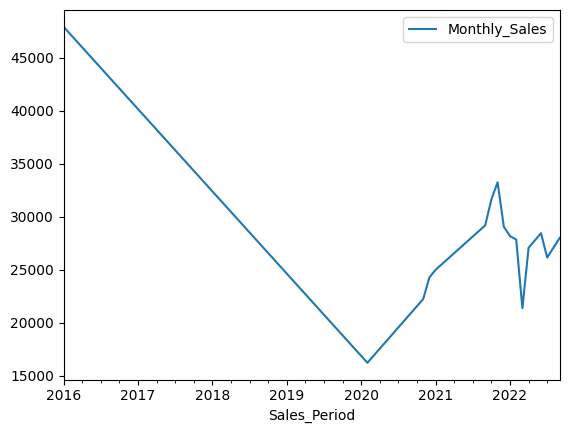

In [217]:
df['Monthly_Sales'] = df['Monthly_Sales'].interpolate()
df.plot(x='Sales_Period',y='Monthly_Sales')